1.  To predict the house price - Regression Problem
2.  ML Model - XGBoost Regressor Model (Supervised ML)
3.  Work Flow
    *   Collect House Price Data - Kaggle Dataset
    *   Data Pre-Processing
    *   Data Analysis - Determine the correlation between features
    *   Train-Test Split
    *   Machine Learning Training - XGBoost Regressor Model (Supervised ML)

Import the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Pre-Processing

In [ ]:
house_data = pd.read_csv('/content/boston.csv')

In [ ]:
house_data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
house_data.shape

(506, 15)

In [ ]:
house_data = house_data.drop(columns=['Unnamed: 0'], axis=1)

In [ ]:
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
house_data.shape

(506, 14)

In [ ]:
# understanding the correlation between various features in the dataset

correlation = house_data.corr()

<Axes: >

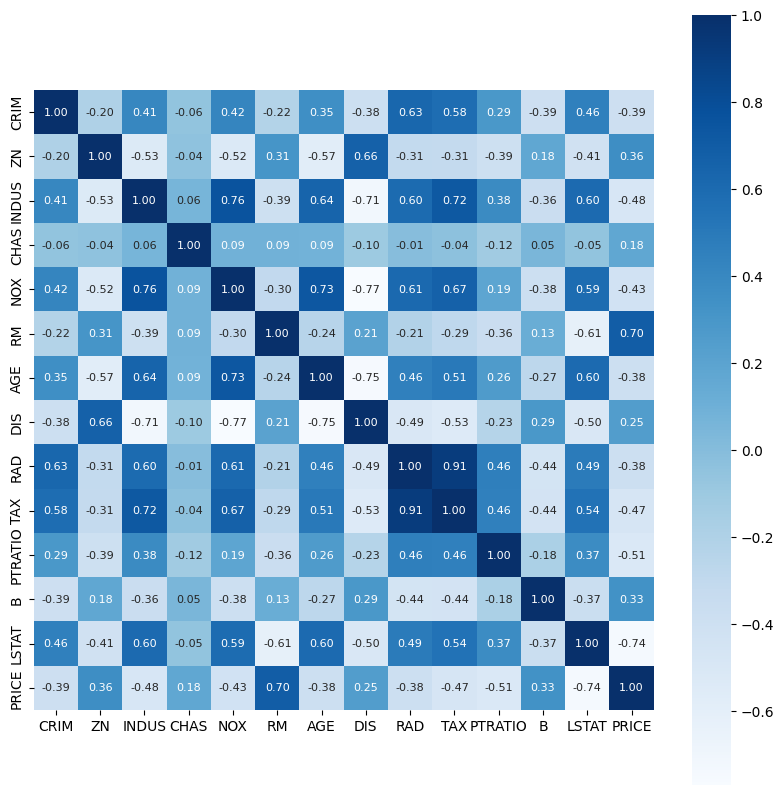

In [ ]:
# constructing heatmap

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

# cbar=True : cbar(colour bar), True(put the colour bar at the side)
# sqaure=True : square shaped
# fmt='.1f' : 1 decimal point
# annot=True : annot(annotation=numbers/labels/etc...), True(put the annotation on the map=numbers/labels/etc...)
# annot_kws={'size':8} : size of annotation of 8 ~ somewhat similar to font size
# cmap='Blues' : the heat map is in blue colour

In [ ]:
X = house_data.drop(columns=['PRICE'], axis=1)
Y = house_data['PRICE']

In [ ]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  

Train-Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Machine Learning Training - XGBoost Regressor Model

In [ ]:
model = XGBRegressor()

In [ ]:
# traning the model with training data

model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model Evaluation

In [ ]:
# accuracy on the training data

X_train_prediction = model.predict(X_train)
accuracy_1 = metrics.r2_score(Y_train, X_train_prediction)
accuracy_2 = metrics.mean_absolute_error(Y_train, X_train_prediction)
print(accuracy_1, accuracy_2)

0.9999980039471451 0.0091330346494618


<function matplotlib.pyplot.show(close=None, block=None)>

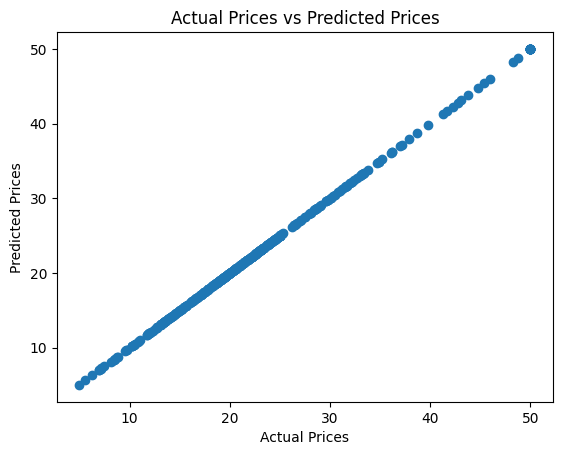

In [ ]:
# visualising the actual prices and predicted prices

plt.scatter(Y_train, X_train_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show

In [ ]:
# accuracy on the test data

X_test_prediction = model.predict(X_test)
accuracy_3 = metrics.r2_score(Y_test, X_test_prediction)
accuracy_4 = metrics.mean_absolute_error(Y_test, X_test_prediction)
print(accuracy_3, accuracy_4)

0.9051721149855378 2.0748727686264927


<function matplotlib.pyplot.show(close=None, block=None)>

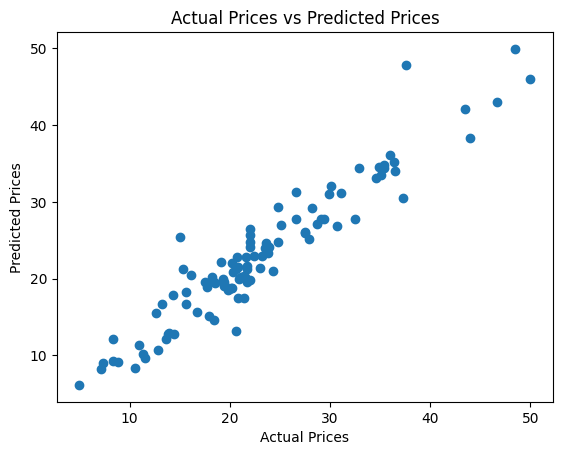

In [ ]:
# visualising the actual prices and predicted prices

plt.scatter(Y_test, X_test_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show